In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime


In [2]:
df= pd.read_csv('amazon_prime_users.csv')

In [3]:
df.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [4]:
# Exploring dataset

In [5]:
df.shape

(2500, 19)

In [6]:
df.columns

Index(['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions'],
      dtype='object')

In [7]:
df.describe()

,User ID,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [9]:
# Gender Wise Comparison

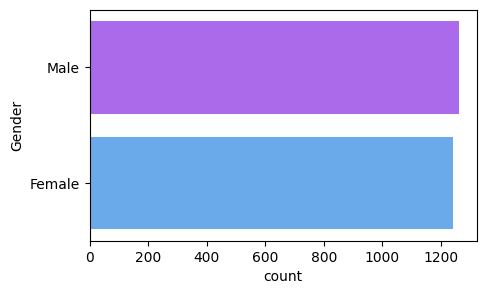

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(y='Gender',data=df,palette='cool_r')
plt.show()

We can see that there are almost equal number of male and female users.

In [11]:
# Changing Columns to datetime Format

In [12]:
df['Date of Birth']=pd.to_datetime(df['Date of Birth'])
df['Membership Start Date']=pd.to_datetime(df['Membership Start Date'])
df['Membership End Date']=pd.to_datetime(df['Membership End Date'])

In [13]:
# Getting age of users

In [14]:
current_date = datetime.now()

df['Age'] = current_date.year - df['Date of Birth'].dt.year
df[['Date of Birth','Age']].head()

,Date of Birth,Age
0,1953-06-03,71
1,1978-07-08,46
2,1994-12-06,30
3,1964-12-22,60
4,1961-06-04,63


In [15]:
# Setting Age_Groups

In [16]:
def age_group(x):
    if x<25:
        return('under-25')
    elif x<60:
        return('under-50')
    else:
        return('above-60')

df['Age Group'] = df['Age'].apply(age_group)

df[['Age','Age Group']].head()


,Age,Age Group
0,71,above-60
1,46,under-50
2,30,under-50
3,60,above-60
4,63,above-60


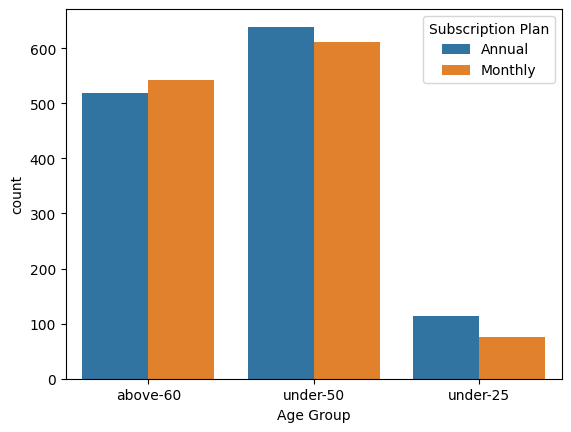

In [17]:
sns.countplot(x='Age Group',data=df,hue='Subscription Plan')
plt.show()

We can clearly see that most of the users prefer Annual Subscription

In [34]:
# Renewal Status

In [47]:
 for i in ['Subscription Plan','Gender','Age Group']:
        print(df.groupby(i)['Renewal Status'].value_counts(),'\n')

Subscription Plan  Renewal Status
Annual             Auto-renew        643
                   Manual            628
Monthly            Auto-renew        631
                   Manual            598
Name: count, dtype: int64 

Gender  Renewal Status
Female  Auto-renew        648
        Manual            592
Male    Manual            634
        Auto-renew        626
Name: count, dtype: int64 

Age Group  Renewal Status
above-60   Auto-renew        538
           Manual            523
under-25   Auto-renew         97
           Manual             92
under-50   Auto-renew        639
           Manual            611
Name: count, dtype: int64 



In [48]:
# Favourite Genre

In [49]:
genre = df['Favorite Genres'].value_counts()

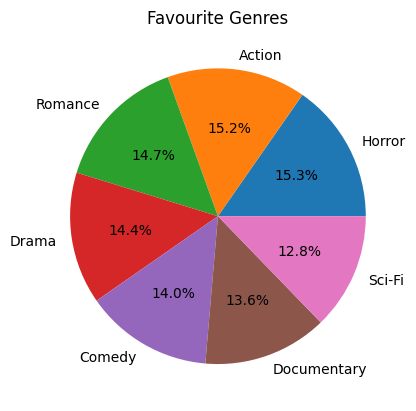

In [52]:
plt.pie(genre.values,labels=genre.index,autopct='%1.1f%%')
plt.title('Favourite Genres')
plt.show()

In [53]:
# Average Feedback/Ratings

In [54]:
df['Feedback/Ratings'].mean()

4.00476

Average Feedback/Ratings is 4.00 which is satisfying for user

In [55]:
payment = df['Payment Information'].value_counts()


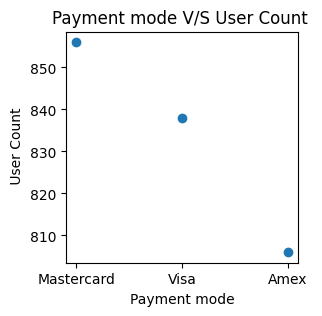

In [65]:
plt.figure(figsize=(3,3))

plt.scatter(payment.index,payment.values)
plt.title('Payment mode V/S User Count ')
plt.xlabel('Payment mode')
plt.ylabel(' User Count')

plt.show()

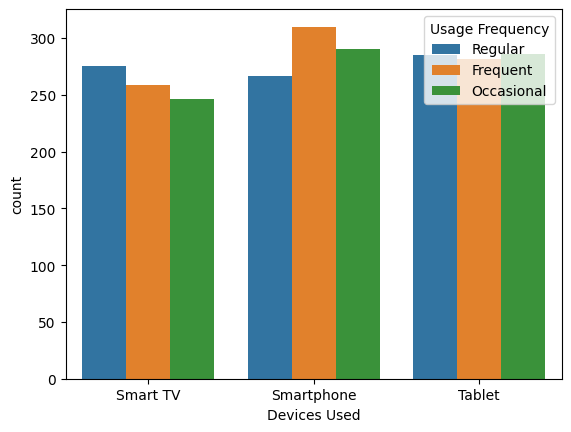

In [69]:
sns.countplot(x='Devices Used',data=df,hue='Usage Frequency')
plt.show()